# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [1]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
### To start off let's do a basic data summary.

# number of training examples
n_train = len(X_train)

# number of testing examples
n_test = len(X_test)

# what's the shape of an image?
#image_shape = train['sizes'][2]
image_shape = X_train[0].shape

# how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [4]:
### y_train to one-hot Y_train
### REF: http://stackoverflow.com/questions/29831489/numpy-1-hot-array

import numpy as np

def convertToOneHot(labels):
    n_classes = max(labels) + 1
    size_labels = len(labels)
    onehot = np.zeros(shape=(size_labels, n_classes),dtype=np.float32)
    onehot[np.arange(size_labels), labels] = 1.
    return onehot

"""Unit Test"""
#print(convertToOneHot([0, 1, 2]))
#print(convertToOneHot([2, 1, 0, 9, 5, 6, 7, 1, 3, 5]))

'Unit Test'

In [5]:
### Y_train

Y_train = convertToOneHot(y_train)
Y_test  = convertToOneHot(y_test)
print (y_train)
print (y_test)
print (Y_train.shape)
print (Y_train[948])
#print (Y_train)
print (Y_train.dtype)
print (Y_test[10])


[ 0  0  0 ..., 42 42 42]
[16  1 38 ...,  6  7 10]
(39209, 43)
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
float32
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


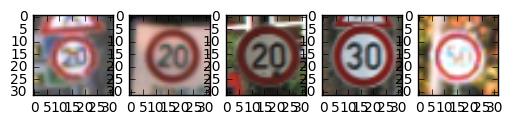

In [6]:
### Train data
from matplotlib import pyplot as plt

#plt.imshow(X_train[0], interpolation='nearest')
#plt.show()
#print (X_train[0].shape)

_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(X_train[0].reshape(32, 32, 3), cmap=plt.cm.Greys);
ax2.imshow(X_train[101].reshape(32, 32, 3), cmap=plt.cm.Greys);
ax3.imshow(X_train[201].reshape(32, 32, 3), cmap=plt.cm.Greys);
ax4.imshow(X_train[1011].reshape(32, 32, 3), cmap=plt.cm.Greys);
ax5.imshow(X_train[3001].reshape(32, 32, 3), cmap=plt.cm.Greys);
plt.show()

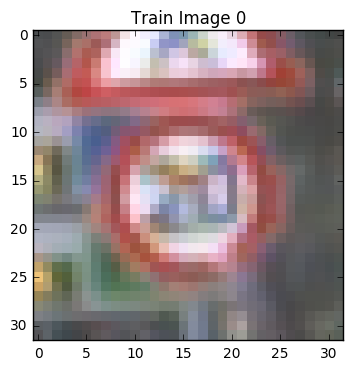

In [7]:
### Data exploration visualization using ipywidgets
### The wigets will make exploration interactive like a GUI
###
### REF: https://github.com/ipython/ipywidgets
###

"""
Addtional requirements

```
conda install -c conda-forge ipywidgets
```

To enable this cell:
1. please intall the addtional requirements
2. and change the cell type from "Markdown" to "Code"

To disable this cell:
1. Chage the cell type to "Markdown" 
"""

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, Image
from IPython.display import display
import ipywidgets as widgets

"""
REF: http://stackoverflow.com/questions/33742331/how-to-set-matplotlib-to-show-every-image-of-an-array
"""
def browse_image_interactive(images, title = 'Image'):
    n_imgs = len(images)
    def view_image (image = 0):
        plt.imshow(images[image], interpolation='nearest', cmap=plt.get_cmap('gray'))
        plt.title('{0} {1}'.format(title, image))
        plt.show()
    interact(view_image, image=(0, n_imgs-1))
    
browse_image_interactive(X_train, title='Train Image')
#browse_image_interactive(X_test, title='Test Image')


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.


In [9]:
### Splipt data into train and validation set
### TODO
num_validation = int(n_train / 3)
num_train = n_train - num_validation

print (num_train, num_validation)


26140 13069


In [10]:
## REF: https://github.com/udacity/CarND-TensorFlow-Lab

#from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
#from tqdm import tqdm

## REF: http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
## Color to Gray
def color_to_grey_image(
    image, 
    use_channel=True,
    norm_type = 0):
    """
    Input:
      image shape: (n, n, 3)
      norm_type = 0: [-0.5, 0.5]
    Return:
    If use_channel:
      return shape(n, n, 1)
    else 
      return shape(n, n)
    """
    g_image = np.mean(image, axis = -1)
    if norm_type == 0:
        g_image = (g_image - (255 / 2.0)) / 255
    
    if use_channel:
        ret_image = np.zeros(
            (image.shape[0], image.shape[1], 1),
            dtype = np.float32)
        ret_image[:,:,0] = g_image
    else:
        ret_image = g_image
    return ret_image
    
def color_to_grey_images(
    images,
    use_channel=True,
    norm_type = 0):
    inum = len(images)
    ishape = images[0].shape
    g_images = np.zeros((inum, ishape[0], ishape[1], 1),
                        dtype = np.float32)
    for n in range(inum):
        g_images[n] = color_to_grey_image(
            images[n], use_channel=use_channel, norm_type=norm_type)
    return g_images

In [11]:
###
### REF: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/tools/docker/notebooks/3_mnist_from_scratch.ipynb
###

def show_grey_image_hist(image, xrange=[-0.5, 0.5], use_channel=True):
    s_image = image
    if use_channel:
        ishape = image.shape
        s_image = np.zeros((ishape[0], ishape[1]))
        s_image = image[:, :, 0]
    _, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(s_image, cmap=plt.cm.Greys);
    ax2.hist(s_image, bins=20, range=xrange);
    plt.show()


In [12]:
## Convert color to grey
X_train_grey = color_to_grey_images(X_train)
X_test_grey = color_to_grey_images(X_test)

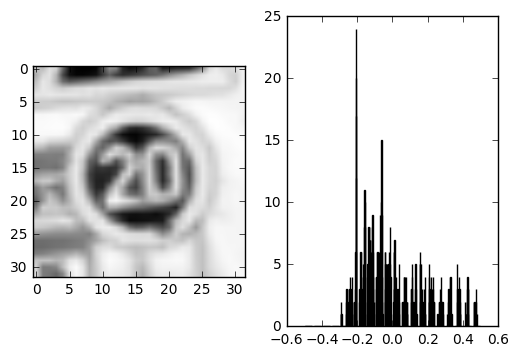

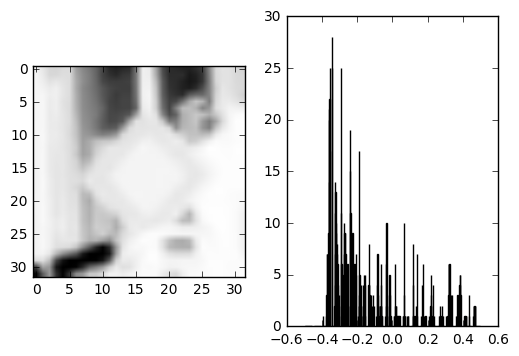

In [13]:
## Show grey image and histogram
show_grey_image_hist(X_train_grey[10], xrange=[-0.5, 0.5])
show_grey_image_hist(X_test_grey[10], xrange=[-0.5, 0.5])


In [50]:
## TensorFlow Session
# Instead of
# with tf.Session() as s:
#  ...training / test / evaluation loop...
#
# Let's create a new interactive session in subsequent code cells.
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.5
si = tf.InteractiveSession(config=config)


# Use our newly created session as the default for 
# subsequent operations.
si.as_default()


In [51]:
### REF: https://www.tensorflow.org/versions/r0.11/tutorials/mnist/pros/index.html#deep-mnist-for-experts
### Try 1

n_channels = 1 # grey color only
n_classes = Y_train.shape[1]
x = tf.placeholder(
    tf.float32,[None, image_shape[0], image_shape[1], n_channels])
y_ = tf.placeholder(tf.float32, [None, n_classes])

# weight initialization
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

# Convolution and Pooling
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

## First Convolutional Layer
# weight tensor shape is 
#  [ patch width, patch height, num of input channels, output channels]
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

# reshape x to a 4d tensor [num of images, image width, image height, color channels]
x_image = x

# convolve x_image with weight tensor, add the bias, apply ReLu function, and max pool
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

## Second Convolutional Layer
# 32 input features, 64 output feature for each 5x5 patch
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

n_neurons = 2048
## Densely Connected Layer
# Image size has been reduced to 8x8
# Add a fully-connected layer with n_neurons neurons.
# Reshape the tensor from teh pooling layer into a batch of vectors,
# multiply by a weight matrix, and a bias, and apply a RelU
W_fc1 = weight_variable([8 * 8 * 64, n_neurons])
b_fc1 = bias_variable([n_neurons])

h_pool2_flat = tf.reshape(h_pool2, [-1, 8 * 8 *64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

## Dropout
# To reduce overfitting
# a placeholder for the probability that a neuron's output is kept during dropout
# TensorFlow's tf.nn.dropout op automatically handles scaling neuron outputs 
# in addition to masking them, so dropout just works without any additional scaling.
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## Readout Layer
W_fc2 = weight_variable([n_neurons, n_classes])
b_fc2 = bias_variable([n_classes])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

print ('y_ = {}'.format(y_conv))
print ('y_conv = {}'.format(y_conv))
print ('h_pool2 = {}'.format(h_pool2))
print ('W_fc1 shape = {}'.format(W_fc1.get_shape()))
print ('W_fc2 shape = {}'.format(W_fc2.get_shape()))

y_ = Tensor("add_22:0", shape=(?, 43), dtype=float32)
y_conv = Tensor("add_22:0", shape=(?, 43), dtype=float32)
h_pool2 = Tensor("MaxPool_13:0", shape=(?, 8, 8, 64), dtype=float32)
W_fc1 shape = (4096, 2048)
W_fc2 shape = (2048, 43)


In [54]:
## Train the Model
#
X_train_set = X_train_grey
X_test_set = X_test_grey
"""batch_data = X_train_set[:batch_size:, :, :]
batch_labels = Y_train[:batch_size]
print (batch_data.shape)
print (batch_labels.shape)"""

batch_size = 200
train_size = Y_train.shape[0]
#steps = 100000
        
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
si.run(tf.initialize_all_variables())

In [75]:
## Unit test
Yconv = y_conv.eval(feed_dict={
        x: X_test_set, y_: Y_test, keep_prob: 1.0})
Y_ = y_.eval(feed_dict={
        x: X_test_set, y_: Y_test, keep_prob: 1.0})
Ycon_pre = np.argmax(Yconv, 1)
Y_pre = np.argmax(Y_, 1)
print(Ycon_pre)
print(Y_pre)
print(np.argmax(Y_test, 1))
cor_pre = np.equal(Ycon_pre, Y_pre)
print(cor_pre)
print(np.mean(cor_pre.astype(np.float32)))

[16  1 38 ...,  5  7 10]
[16  1 38 ...,  6  7 10]
[16  1 38 ...,  6  7 10]
[ True  True  True ..., False  True  True]
0.912747


In [74]:
steps = 20000
for step in range(steps):
    offset = (step * batch_size) % (train_size - batch_size)
    batch_data = X_train_set[offset:(offset + batch_size), :, :, :]
    batch_labels = Y_train[offset:(offset + batch_size)]
    if step % 200 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch_data, y_: batch_labels, keep_prob: 1.0})
        print("step %d, training accuracy %g"%(step, train_accuracy))
    train_step.run(feed_dict={x: batch_data, y_: batch_labels, keep_prob: 0.5})
    if step % 500 == 0:
        print("test accuracy %g"%accuracy.eval(feed_dict={
        x: X_test_set, y_: Y_test, keep_prob: 1.0}))

step 0, training accuracy 0.945
test accuracy 0.861204
step 200, training accuracy 1
step 400, training accuracy 0.995
test accuracy 0.886699
step 600, training accuracy 1
step 800, training accuracy 1
step 1000, training accuracy 1
test accuracy 0.903168
step 1200, training accuracy 1
step 1400, training accuracy 1
test accuracy 0.904038
step 1600, training accuracy 1
step 1800, training accuracy 1
step 2000, training accuracy 1
test accuracy 0.903722
step 2200, training accuracy 1
step 2400, training accuracy 0.995
test accuracy 0.90293
step 2600, training accuracy 1
step 2800, training accuracy 1
step 3000, training accuracy 1
test accuracy 0.904751
step 3200, training accuracy 1
step 3400, training accuracy 1
test accuracy 0.905384
step 3600, training accuracy 1
step 3800, training accuracy 1
step 4000, training accuracy 1
test accuracy 0.903563
step 4200, training accuracy 1
step 4400, training accuracy 1
test accuracy 0.901188
step 4600, training accuracy 1
step 4800, training ac

In [34]:
###
### REF: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/tools/docker/notebooks/3_mnist_from_scratch.ipynb
### REF: https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/3_NeuralNetworks/convolutional_network.ipynb
### REF: http://people.idsia.ch/~juergen/nn2012traffic.pdf
### Try 2

# Parameters
learning_rate = 0.001
training_iters = 200
batch_size = 60
display_step = 10
n_channels = 1
seed = 45

X_train_set = X_train_grey
X_test_set = X_test_grey

# Network Parameters
n_input = image_shape[0] * image_shape[1]
n_classes = Y_train.shape[1]
train_size = Y_train.shape[0]

# tf Graph input
#x_node = tf.placeholder(tf.float32, [None, n_input, n_channels])
x_node = tf.placeholder(
    tf.float32,[batch_size, image_shape[1], image_shape[0], n_channels])
y_node = tf.placeholder(tf.float32, [batch_size, n_classes])
#validation_node = tf.constant(
#    tf.float32,[batch_size, image_shape[1], image_shape[0], n_channels])
test_node = tf.constant(X_test_set)

keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)

conv1_weights_node = tf.Variable(
    tf.random_normal([5, 5, n_channels, 32]))
conv1_biases_node = tf.Variable(tf.zeros([32]))
conv2_weights_node = tf.Variable(
    tf.random_normal([5, 5, 32, 64]))
conv2_biases_node = tf.Variable(tf.constant(0.1, shape=[64]))
fc1_weights_node = tf.Variable(tf.random_normal([4096, 512]))
fc1_biases_node = tf.Variable(tf.constant(.01, shape=[512]))
fc2_weights_node = tf.Variable(
    tf.random_normal([512, n_classes]))
fc2_biases_node = tf.Variable(tf.constant(0.1, shape=[n_classes]))
    

In [35]:
###
### REF: https://github.com/tensorflow/tensorflow/blob/master/tensorflow/tools/docker/notebooks/3_mnist_from_scratch.ipynb

def mnist_model(data, train=False):
  """The Model definition."""
  # 2D convolution, with 'SAME' padding (i.e. the output feature map has
  # shape matches the data layout: [image index, y, x, depth].
  conv = tf.nn.conv2d(data,
                      conv1_weights_node,
                      strides=[1, 1, 1, 1],
                      padding='SAME')

  # Bias and rectified linear non-linearity.
  relu = tf.nn.relu(tf.nn.bias_add(conv, conv1_biases_node))
  
  # Max pooling. The kernel size spec ksize also follows the layout of
  # the data. Here we have a pooling window of 2, and a stride of 2.
  pool = tf.nn.max_pool(relu,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME')
  conv = tf.nn.conv2d(pool,
                      conv2_weights_node,
                      strides=[1, 1, 1, 1],
                      padding='SAME')
  relu = tf.nn.relu(tf.nn.bias_add(conv, conv2_biases_node))
  pool = tf.nn.max_pool(relu,
                        ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1],
                        padding='SAME')
  
  # Reshape the feature map cuboid into a 2D matrix to feed it to the
  # fully connected layers.
  pool_shape = pool.get_shape().as_list()
  reshape = tf.reshape(
      pool,
      [pool_shape[0], pool_shape[1] * pool_shape[2] * pool_shape[3]])
  
  print ('reshape.shape={}'.format(reshape.get_shape()))
  print ('fc1_weights_node.shape={}'.format(fc1_weights_node.get_shape()))
  # Fully connected layer. Note that the '+' operation automatically
  # broadcasts the biases.
  hidden = tf.nn.relu(
        tf.matmul(reshape, fc1_weights_node) + fc1_biases_node)
  
  # Add a 50% dropout during training only. Dropout also scales
  # activations such that no rescaling is needed at evaluation time.
  if train:
    hidden = tf.nn.dropout(hidden, 0.5, seed=seed)
  return tf.matmul(hidden, fc2_weights_node) + fc2_biases_node


In [36]:

# Mnist Way of Trainning
logits = mnist_model(x_node, True)
print ('y_node.shape={}'.format(y_node.get_shape()))
print ('logits.shape={}'.format(logits.get_shape()))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
  logits, y_node))

"""# L2 regularization for the fully connected parameters.
regularizers = (tf.nn.l2_loss(fc1_weights_node) + 
                tf.nn.l2_loss(fc1_biases_node) +
                tf.nn.l2_loss(fc2_weights_node) + 
                tf.nn.l2_loss(fc2_biases_node))
# Add the regularization term to the loss.
loss += 5e-4 * regularizers"""

# Optimizer: set up a variable that's incremented once per batch and
# controls the learning rate decay.
batch = tf.Variable(0)
# Decay once per epoch, using an exponential schedule starting at 0.01.
learning_rate = tf.train.exponential_decay(
  0.01,                # Base learning rate.
  batch * batch_size,  # Current index into the dataset.
  train_size,          # Decay step.
  0.95,                # Decay rate.
  staircase=True)
# Use simple momentum for the optimization.
optimizer = tf.train.MomentumOptimizer(learning_rate,
                                       0.9).minimize(loss,
                                                     global_step=batch)

"""optimizer = tf.train.AdamOptimizer(
    learning_rate=learning_rate).minimize(loss)"""
print ('lost={}'.format(loss))
train_prediction = tf.nn.softmax(logits)
#validation_prediction = tf.nn.softmax(mnist_model(validation_node))
#test_prediction = tf.nn.softmax(mnist_model(y_node))
test_prediction = tf.nn.softmax(mnist_model(test_node))

reshape.shape=(60, 4096)
fc1_weights_node.shape=(4096, 512)
y_node.shape=(60, 43)
logits.shape=(60, 43)
lost=Tensor("Mean_20:0", shape=(), dtype=float32)
reshape.shape=(12630, 4096)
fc1_weights_node.shape=(4096, 512)


In [37]:
## TODO
def error_rate(predictions, labels):
  """Return the error rate and confusions."""
  correct = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
  total = predictions.shape[0]

  error = 100.0 - (100 * float(correct) / float(total))

  return error


In [38]:
# Initialize all the variables we defined above.
tf.initialize_all_variables().run()

In [39]:
## Training in batch
batch_data = X_train_grey[:batch_size:, :, :]
batch_labels = Y_train[:batch_size]
print (batch_data.shape)
print (batch_labels.shape)
print (x_node.get_shape())
print (y_node.get_shape())
feed_dict = {x_node: batch_data,
             y_node: batch_labels}

_, l, lr, predictions = si.run(
    [optimizer, loss, learning_rate, train_prediction],
    feed_dict=feed_dict)


(60, 32, 32, 1)
(60, 43)
(60, 32, 32, 1)
(60, 43)


In [40]:

print (predictions[0])
print ('First prediction {}'.format(np.argmax(predictions[0])))

# predictions is actually a list of BATCH_SIZE probability vectors.
# take the highest probability for each vector.
print ('All predictions {}'.format(np.argmax(predictions, 1)))
print ('All labels {}'.format(np.argmax(batch_labels, 1)))
print (l, lr)
print (predictions, batch_labels)
print ('Error = {}'.format(error_rate(predictions, batch_labels)))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
First prediction 26
All predictions [26  0  7  0 37  9 36  5 42 31 28  5  7 12 16 16 36  0  9 16 37 30 26 16 19
 30 20 31 30  9  0 20  4 37 14 42 37  7 31 30 20 16 37  7 12 16 37 36  7 31
 29 21 37 29 16 31 37 37 21 21]
All labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
54997.2 0.01
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] [[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]]
Error = 93.33333333333333


In [41]:
steps = int(train_size / batch_size)
steps = 30000
print (train_size, steps)

for step in range(steps):
    offset = (step * batch_size) % (train_size - batch_size)
    batch_data = X_train_grey[offset:(offset + batch_size), :, :, :]
    batch_labels = Y_train[offset:(offset + batch_size)]
    feed_dict = {x_node: batch_data,
                y_node: batch_labels}
    _, l, lr, predictions = si.run(
    [optimizer, loss, learning_rate, train_prediction],
    feed_dict=feed_dict)
    if step % 100 == 0:
        error = error_rate(predictions, batch_labels)
        print('Step {} of {}: offeset={}'.format(step, steps, offset) )
        print('Batch loss: {:.5f} Error: {:.5f} Learning rate: {:5f}'
             .format(l, error, lr))
        """print('Validation error: {:.1f}'
             .format(error_rate(
                validation_prediction.eval(), validation_labels)[0]))"""
        

39209 30000
Step 0 of 30000: offeset=0
Batch loss: 0.00000 Error: 0.00000 Learning rate: 0.010000
Step 100 of 30000: offeset=6000
Batch loss: nan Error: 100.00000 Learning rate: 0.010000
Step 200 of 30000: offeset=12000
Batch loss: nan Error: 100.00000 Learning rate: 0.010000
Step 300 of 30000: offeset=18000
Batch loss: nan Error: 100.00000 Learning rate: 0.010000
Step 400 of 30000: offeset=24000
Batch loss: nan Error: 100.00000 Learning rate: 0.010000
Step 500 of 30000: offeset=30000
Batch loss: nan Error: 100.00000 Learning rate: 0.010000
Step 600 of 30000: offeset=36000
Batch loss: nan Error: 100.00000 Learning rate: 0.010000
Step 700 of 30000: offeset=2851
Batch loss: nan Error: 100.00000 Learning rate: 0.009500
Step 800 of 30000: offeset=8851
Batch loss: nan Error: 100.00000 Learning rate: 0.009500
Step 900 of 30000: offeset=14851
Batch loss: nan Error: 100.00000 Learning rate: 0.009500
Step 1000 of 30000: offeset=20851
Batch loss: nan Error: 100.00000 Learning rate: 0.009500
Step

In [42]:
si.close()

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

1. Grey scale
2. normalize
    [0.0, 1.0]
    [-0.5 , 0.5]

In [43]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [44]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [45]:
### Train your model here.
### Feel free to use as many code cells as needed.



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [46]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [47]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [48]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.